In [85]:
import pandas as pd

Open csv:


In [237]:
weather = pd.read_csv('weather_data.csv',header='infer')
#weather = pd.DataFrame(weather)

Drop non used columns:

In [238]:
weather = weather.drop(columns=['Province/State','ConfirmedCases', 'Fatalities','day_from_jan_first','ah'], axis = 1)
weather

,Id,Country/Region,Lat,Long,Date,temp,min,max,stp,slp,dewp,rh,wdsp,prcp,fog
0,1,Afghanistan,33.0000,65.0000,2020-01-22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,9.4,0.00,0
1,2,Afghanistan,33.0000,65.0000,2020-01-23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,14.9,99.99,1
2,3,Afghanistan,33.0000,65.0000,2020-01-24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,10.4,0.17,1
3,4,Afghanistan,33.0000,65.0000,2020-01-25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,6.1,0.57,1
4,5,Afghanistan,33.0000,65.0000,2020-01-26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,10.8,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,26378,Zambia,-15.4167,28.2833,2020-03-20,70.6,62.6,81.9,999.9,NaN,62.8,0.761545,6.0,0.00,0
17888,26379,Zambia,-15.4167,28.2833,2020-03-21,71.3,66.2,81.5,999.9,NaN,65.3,0.812047,7.1,99.99,1
17889,26380,Zambia,-15.4167,28.2833,2020-03-22,72.1,67.1,80.4,999.9,NaN,66.7,0.829815,5.0,99.99,1
17890,26381,Zambia,-15.4167,28.2833,2020-03-23,71.7,66.2,80.6,999.9,NaN,62.8,0.733343,4.2,0.00,0


In [239]:
weather.columns = ['Id','Place','Lat','Long','Date','mean_temp','min_temp','max_temp','pressure','sea_level','dew_point','humidity','wind_speed','precipitation','fog']

Get the information of just one day per country (22-01-2020):

In [240]:
weather = weather.groupby('Place').first().reset_index()
weather = weather.drop(columns = 'Id', axis = 1)
data = weather

In [140]:
data

,Place,Lat,Long,Date,mean_temp,min_temp,max_temp,pressure,sea_level,dew_point,humidity,wind_speed,precipitation,fog
0,Afghanistan,33.0000,65.0000,2020-01-22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,9.4,0.00,0
1,Albania,41.1533,20.1683,2020-01-22,42.3,31.3,55.8,18.9,1029.3,32.8,0.687721,0.2,0.00,0
2,Algeria,28.0339,1.6596,2020-01-22,64.9,49.6,82.4,999.9,1017.1,25.7,0.223737,5.5,0.00,0
3,Andorra,42.5063,1.5218,2020-01-22,26.2,18.0,41.7,869.7,NaN,21.1,0.807797,1.6,0.00,0
4,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,76.8,71.8,81.7,11.5,1013.9,67.8,0.735384,6.0,0.03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Uruguay,-32.5228,-55.7658,2020-01-22,80.8,69.3,86.0,7.9,1013.4,66.6,0.617350,10.7,0.00,0
159,Uzbekistan,41.3775,64.5853,2020-01-22,29.8,22.3,34.5,997.8,1027.9,20.9,0.690918,8.0,0.00,0
160,Venezuela,6.4238,-66.5897,2020-01-22,88.8,76.6,96.8,1.9,1008.4,73.3,0.599606,4.7,0.00,0
161,Vietnam,16.0000,108.0000,2020-01-22,75.6,68.0,82.9,999.9,NaN,67.3,0.752455,3.8,0.00,0


In [241]:
data = data.drop(columns=['Lat','Long','Date'], axis = 1)

In [242]:
data

,Place,mean_temp,min_temp,max_temp,pressure,sea_level,dew_point,humidity,wind_speed,precipitation,fog
0,Afghanistan,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,9.4,0.00,0
1,Albania,42.3,31.3,55.8,18.9,1029.3,32.8,0.687721,0.2,0.00,0
2,Algeria,64.9,49.6,82.4,999.9,1017.1,25.7,0.223737,5.5,0.00,0
3,Andorra,26.2,18.0,41.7,869.7,NaN,21.1,0.807797,1.6,0.00,0
4,Antigua and Barbuda,76.8,71.8,81.7,11.5,1013.9,67.8,0.735384,6.0,0.03,1
...,...,...,...,...,...,...,...,...,...,...,...
158,Uruguay,80.8,69.3,86.0,7.9,1013.4,66.6,0.617350,10.7,0.00,0
159,Uzbekistan,29.8,22.3,34.5,997.8,1027.9,20.9,0.690918,8.0,0.00,0
160,Venezuela,88.8,76.6,96.8,1.9,1008.4,73.3,0.599606,4.7,0.00,0
161,Vietnam,75.6,68.0,82.9,999.9,NaN,67.3,0.752455,3.8,0.00,0


Handle missing values (substitute it by the median value):

In [243]:
data = data.fillna(data.sea_level.median())
data

,Place,mean_temp,min_temp,max_temp,pressure,sea_level,dew_point,humidity,wind_speed,precipitation,fog
0,Afghanistan,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,9.4,0.00,0
1,Albania,42.3,31.3,55.8,18.9,1029.3,32.8,0.687721,0.2,0.00,0
2,Algeria,64.9,49.6,82.4,999.9,1017.1,25.7,0.223737,5.5,0.00,0
3,Andorra,26.2,18.0,41.7,869.7,1014.8,21.1,0.807797,1.6,0.00,0
4,Antigua and Barbuda,76.8,71.8,81.7,11.5,1013.9,67.8,0.735384,6.0,0.03,1
...,...,...,...,...,...,...,...,...,...,...,...
158,Uruguay,80.8,69.3,86.0,7.9,1013.4,66.6,0.617350,10.7,0.00,0
159,Uzbekistan,29.8,22.3,34.5,997.8,1027.9,20.9,0.690918,8.0,0.00,0
160,Venezuela,88.8,76.6,96.8,1.9,1008.4,73.3,0.599606,4.7,0.00,0
161,Vietnam,75.6,68.0,82.9,999.9,1014.8,67.3,0.752455,3.8,0.00,0


In order to check which countries have similar weather conditions, we run some clustering algorithms where the inputs are several weather parameters:


### K - Means method:

K-means is a clustering algorithm that searches for k centroids (k being the number of clusters) that are, at most, at a certain distance from every point inside the cluster.

In [283]:
from sklearn import cluster

#K-means just work on relevant features
data_cluster = data.drop('Place',axis=1)

# Calculation 6 clusters
k_means = cluster.KMeans(n_clusters=6, max_iter=20, random_state=1)
k_means.fit(data_cluster) 

labels = k_means.labels_
pd.DataFrame(labels, index=data.Place, columns=['Cluster ID'])

,Cluster ID
Place,
Afghanistan,5
Albania,1
Algeria,0
Andorra,3
Antigua and Barbuda,1
...,...
Uruguay,1
Uzbekistan,5
Venezuela,1


We noticed that from 20 iterations the centroids did not change, so we kept just 20 iterations for the algorithm.


In [284]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data_cluster.columns)

,mean_temp,min_temp,max_temp,pressure,sea_level,dew_point,humidity,wind_speed,precipitation,fog
0,75.716364,66.265455,85.080000,984.149091,1013.140000,61.992727,0.656988,5.956364,0.073636,0.218182
1,58.420000,50.744444,66.380000,12.680000,1019.180000,48.893333,0.730950,6.260000,4.500889,0.311111
2,45.925000,40.225000,55.900000,938.750000,1015.600000,34.125000,0.662102,999.900000,0.000000,0.000000
3,26.408333,18.325000,36.333333,853.458333,1014.175000,17.416667,0.699003,6.116667,8.332500,0.333333
4,57.369231,50.384615,64.576923,986.476923,1014.861538,51.323077,0.813315,6.669231,99.990000,1.000000
5,39.235294,29.911765,48.114706,989.488235,1020.535294,26.700000,0.677982,5.738235,0.009706,0.176471


By the centroids and the class values, we get an idea of how countries that are near each other in the globe have similar temperatures and overall similar weather conditions. For example, Uzbekistan and Afghanistan share a border and have similar weather conditions. By that, they are encountered inside the same cluster.

We defined 6 as the number of clusters since, after some attempts, this number showed some reasonable results related to the real weather conditions' similarity between the countries inside the same cluster.

### DBSCAN and K-Means Method's comparison:

In this section we will compare, visually, the performance of two clustering techniques. For us to be able to check the performance, we will just use two parameters : the mean temperature and the humidity's levels since, from our point of view, they can together describe useful conditions of the weather.

In [246]:
data

,Place,mean_temp,min_temp,max_temp,pressure,sea_level,dew_point,humidity,wind_speed,precipitation,fog
0,Afghanistan,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,9.4,0.00,0
1,Albania,42.3,31.3,55.8,18.9,1029.3,32.8,0.687721,0.2,0.00,0
2,Algeria,64.9,49.6,82.4,999.9,1017.1,25.7,0.223737,5.5,0.00,0
3,Andorra,26.2,18.0,41.7,869.7,1014.8,21.1,0.807797,1.6,0.00,0
4,Antigua and Barbuda,76.8,71.8,81.7,11.5,1013.9,67.8,0.735384,6.0,0.03,1
...,...,...,...,...,...,...,...,...,...,...,...
158,Uruguay,80.8,69.3,86.0,7.9,1013.4,66.6,0.617350,10.7,0.00,0
159,Uzbekistan,29.8,22.3,34.5,997.8,1027.9,20.9,0.690918,8.0,0.00,0
160,Venezuela,88.8,76.6,96.8,1.9,1008.4,73.3,0.599606,4.7,0.00,0
161,Vietnam,75.6,68.0,82.9,999.9,1014.8,67.3,0.752455,3.8,0.00,0


In [247]:
#Some preprocessing
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import preprocessing

#Get just a 2D dataFrame
data2d = data.drop(['Place','min_temp','max_temp','pressure','sea_level','dew_point','wind_speed','precipitation','fog'],axis=1)
data2d

,mean_temp,humidity
0,42.6,0.545709
1,42.3,0.687721
2,64.9,0.223737
3,26.2,0.807797
4,76.8,0.735384
...,...,...
158,80.8,0.617350
159,29.8,0.690918
160,88.8,0.599606
161,75.6,0.752455


Normalization of the mean_temperature parameter (by dividing each column value by the max value of temperature registered):

,mean_temp,humidity
0,0.479730,0.545709
1,0.476351,0.687721
2,0.730856,0.223737
3,0.295045,0.807797
4,0.864865,0.735384
...,...,...
158,0.909910,0.617350
159,0.335586,0.690918
160,1.000000,0.599606
161,0.851351,0.752455


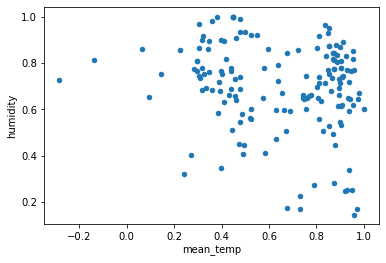

In [287]:
data2d['mean_temp'] = data2d['mean_temp']/data2d['mean_temp'].abs().max()
data2d.plot.scatter(x='mean_temp',y='humidity')
data2d

Since the dataset is a real case scenario, the clusters are not obviously distributed and there are some points really sparse in the domain.

<AxesSubplot:xlabel='mean_temp', ylabel='humidity'>

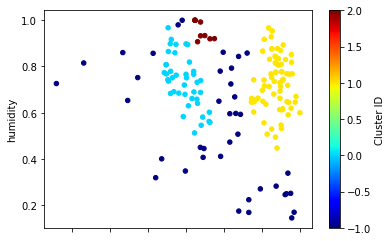

In [274]:
db = DBSCAN(eps=0.065, min_samples=5).fit(data2d)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data2d,labels), axis=1)
result.plot.scatter(x='mean_temp',y='humidity',c='Cluster ID', colormap='jet')

<AxesSubplot:xlabel='mean_temp', ylabel='humidity'>

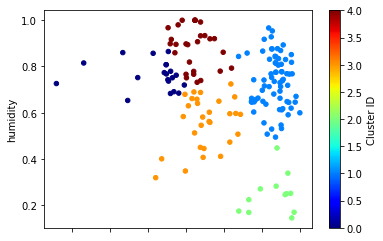

In [290]:
#K-means just work on relevant features
data2d

# Calculation 2 clusters
k_means = cluster.KMeans(n_clusters=5, max_iter=25, random_state=1)
k_means.fit(data2d) 

labels = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result = pd.concat((data2d,labels), axis=1)
result.plot.scatter(x='mean_temp',y='humidity',c='Cluster ID', colormap='jet')

By the results we can infer that K-means method did a good job in finding the right clusters. Of course there are some points that leave us in doubt, nevertheless the there is some similarity well noticed between the same cluster's data points and dissimilarity between different clusters (exept maybe for the cluster with the colour dark blue that is very close to other clusters. The fact that real data is being used makes the clusters more hard to distinguish.
From K-means, we can check the countries that have similar temperature and humidity conditions.

On the other hand, the results obtained with DBScan were not very good because the right value for eps is really hard to find. We managed to try several but the best one was not achieved. The normalization of the mean temperature values helped improving the results but still just two big noticeable clusters can be identified (the yellow and the light blue).

